## Select_and_copy_S3_Pea_Island_local

Use a lat/lon bounding box and image locations in the navigation files to copy a subset of images from a local directory a local directory. Make a quick plot of the image locations copied.

In [18]:
import os
import shutil
import pandas as pd
# import boto3
import matplotlib.pyplot as plt
%matplotlib inline

# bounding coords for all of Pea Island
latmin = 35.604
latmax = 35.775
lonmin = -75.54
lonmax = -75.44

# location of navigation files
parent_dir = 'D:\\data\\2019_DorianOBX\\2019_all_flights_locations'
nav_files = ['2019_0830_ppk-photo-locations-mbase-GP161658.txt',\
             '2019_0830_ppk-photo-locations-mbase-GP192757.txt']

# how many rows to skip at top of each file?
skiprows = [35, 35]
path=[]
for i in range(len(nav_files)):
   path.append( os.path.join(parent_dir,nav_files[i]) )


for n in range(len(nav_files)):
    df = pd.read_csv(path[n], skiprows=skiprows[n], header=None, delim_whitespace=True,\
                    names = ['image_name','easting','northing','elev','lat','lon','ell','one',\
                             'SDHeight','SDHoriz','UTCDate','UTCTime','UTCSeconds'])
    print('n=',n)
    if n == 0:
        #dfs[hort] will accumulate locations inside bounding box
        dfs = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} images.".format(len(dfs)))
        
        # dfa[all] will accumulate all locations
        dfa = df.copy()
        print("{} images now in dfa".format(len(dfa)))

    elif n>0:
        # dft[emp] has new points
        dft = df[ (df['lat']>=latmin) & (df['lat']<=latmax) & (df['lon']>=lonmin) & (df['lon']<=lonmax) ]
        print("Found {} more images.".format(len(dft)))
        
        # append new points to dfs
        dfs = dfs.append( dft, ignore_index=True )
        print("{} images now in dfs.".format(len(dfs)))
        dfa = dfa.append( df, ignore_index=True )
        print("{} images now in dfa".format(len(dfa)))


dfa.describe()

n= 0
Found 388 images.
8074 images now in dfa
n= 1
Found 755 more images.
1143 images now in dfs.
18450 images now in dfa


,easting,northing,elev,lat,lon,ell,one,SDHeight,SDHoriz,UTCSeconds
count,18450.000000,1.845000e+04,18450.000000,18450.000000,18450.000000,18450.000000,18450.000000,18450.000000,18450.000000,18450.000000
mean,417825.549216,3.907747e+06,290.357738,35.309054,-75.902504,251.946878,1.040542,0.023559,0.014756,502728.199554
std,32059.556507,5.563992e+04,51.497190,0.503626,0.347923,51.425003,0.216866,0.022577,0.012195,7040.389822
min,358960.481000,3.825794e+06,127.853000,34.564455,-76.537908,89.191000,1.000000,0.016000,0.010000,491041.031000
25%,389005.784250,3.866288e+06,300.110500,34.932996,-76.215327,261.536250,1.000000,0.020000,0.012000,496049.278250
50%,425169.390500,3.895118e+06,307.584500,35.196816,-75.829776,269.121500,1.000000,0.021000,0.013000,503834.545500
75%,448134.381000,3.945010e+06,313.650250,35.647997,-75.572745,275.217750,1.000000,0.025000,0.015000,508981.771500
max,458324.543000,4.046674e+06,353.934000,36.562316,-75.459958,315.267000,4.000000,1.904000,0.999000,513963.018000


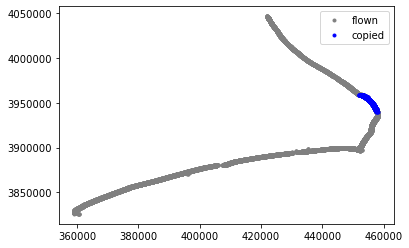

In [10]:
# Make a simple plot
easting = dfa['easting'].values
northing = dfa['northing'].values
eastings = dfs['easting'].values
northings = dfs['northing'].values
plt.plot(easting,northing,'.',color='gray',label='flown')
plt.plot(eastings,northings,'.',color='blue',label='copied')
plt.legend()
plt.show()

In [20]:
local_folders = [\
           'D:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight1-0830\\',\
           'D:\\data\\HxDorian_2019\\pre-storm\\images\\jpgs\\flight2-0830\\']

attempts = 0
icount = 0
for f in dfs['image_name'].values :
    local_dest = 'D:\\data\\HxDorian_2019\\2019-08-30_Pea_Island_jpg\\'+f
    for s3f in local_folders:
        try:
            attempts = attempts+1
            src_key = s3f+f
            # print("Trying {}\nto {}".format(src_key,local_dest))
            shutil.copyfile(src_key, local_dest)
            print("Copied "+local_dest)
            icount = icount +1
        except:
            print("Fail: "+src_key)
            attempts = attempts+1

          
print("Copied {} files.".format(icount))
print("Attempted {} files.".format(attempts))

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184627-DSC03307-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184627-DSC03307-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184628-DSC03308-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184628-DSC03308-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184629-DSC03309-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184629-DSC03309-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184630-DSC03310-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184630-DSC03310-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184631-DSC03311-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184631-DSC03311-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184710-DSC03350-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184710-DSC03350-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184711-DSC03351-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184711-DSC03351-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184712-DSC03352-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184712-DSC03352-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184713-DSC03353-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184713-DSC03353-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184714-DSC03354-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184714-DSC03354-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184753-DSC03393-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184753-DSC03393-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184754-DSC03394-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184754-DSC03394-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184755-DSC03395-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184755-DSC03395-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184756-DSC03396-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184756-DSC03396-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184757-DSC03397-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184757-DSC03397-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184836-DSC03436-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184836-DSC03436-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184837-DSC03437-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184837-DSC03437-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184838-DSC03438-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184838-DSC03438-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184839-DSC03439-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184839-DSC03439-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184840-DSC03440-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184840-DSC03440-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184919-DSC03479-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184919-DSC03479-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184920-DSC03480-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184920-DSC03480-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184921-DSC03481-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184921-DSC03481-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184922-DSC03482-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184922-DSC03482-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-184923-DSC03483-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-184923-DSC03483-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185002-DSC03522-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185002-DSC03522-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185003-DSC03523-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185003-DSC03523-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185004-DSC03524-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185004-DSC03524-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185005-DSC03525-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185005-DSC03525-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185006-DSC03526-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185006-DSC03526-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185045-DSC03565-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185045-DSC03565-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185046-DSC03566-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185046-DSC03566-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185047-DSC03567-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185047-DSC03567-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185048-DSC03568-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185048-DSC03568-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185049-DSC03569-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185049-DSC03569-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185128-DSC03608-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185128-DSC03608-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185129-DSC03609-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185129-DSC03609-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185130-DSC03610-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185130-DSC03610-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185131-DSC03611-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185131-DSC03611-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185132-DSC03612-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185132-DSC03612-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185340-DSC03651-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185340-DSC03651-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185341-DSC03652-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185341-DSC03652-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185342-DSC03653-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185342-DSC03653-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185343-DSC03654-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185343-DSC03654-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185344-DSC03655-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185344-DSC03655-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-185423-DSC03694-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight2-0830\2019-0830-185423-DSC03694-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194442-DSC04382-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194442-DSC04382-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194443-DSC04383-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194443-DSC04383-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194444-DSC04384-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194444-DSC04384-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194445-DSC04385-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194445-DSC04385-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\im

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194524-DSC04424-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194525-DSC04425-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194525-DSC04425-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194526-DSC04426-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194526-DSC04426-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194527-DSC04427-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194527-DSC04427-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194528-DSC04428-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194528-DSC04428-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194529-DSC04429-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194607-DSC04467-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194608-DSC04468-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194608-DSC04468-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194609-DSC04469-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194609-DSC04469-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194610-DSC04470-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194610-DSC04470-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194611-DSC04471-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194611-DSC04471-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194612-DSC04472-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194650-DSC04510-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194651-DSC04511-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194651-DSC04511-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194652-DSC04512-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194652-DSC04512-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194653-DSC04513-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194653-DSC04513-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194654-DSC04514-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194654-DSC04514-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194655-DSC04515-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194733-DSC04553-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194734-DSC04554-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194734-DSC04554-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194735-DSC04555-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194735-DSC04555-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194736-DSC04556-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194736-DSC04556-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194737-DSC04557-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194737-DSC04557-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194738-DSC04558-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194816-DSC04596-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194817-DSC04597-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194817-DSC04597-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194818-DSC04598-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194818-DSC04598-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194819-DSC04599-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194819-DSC04599-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194820-DSC04600-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194820-DSC04600-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194821-DSC04601-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194859-DSC04639-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194900-DSC04640-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194900-DSC04640-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194901-DSC04641-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194901-DSC04641-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194902-DSC04642-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194902-DSC04642-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194903-DSC04643-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194903-DSC04643-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194904-DSC04644-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194942-DSC04682-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194943-DSC04683-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194943-DSC04683-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194944-DSC04684-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194944-DSC04684-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194945-DSC04685-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194945-DSC04685-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194946-DSC04686-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-194946-DSC04686-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-194947-DSC04687-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195025-DSC04725-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195026-DSC04726-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195026-DSC04726-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195027-DSC04727-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195027-DSC04727-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195028-DSC04728-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195028-DSC04728-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195029-DSC04729-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195029-DSC04729-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195030-DSC04730-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195108-DSC04768-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195109-DSC04769-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195109-DSC04769-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195110-DSC04770-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195110-DSC04770-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195111-DSC04771-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195111-DSC04771-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195112-DSC04772-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-195112-DSC04772-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-195113-DSC04773-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214553-DSC00982-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214554-DSC00983-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214554-DSC00983-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214555-DSC00984-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214555-DSC00984-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214556-DSC00985-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214556-DSC00985-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214557-DSC00986-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214557-DSC00986-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214558-DSC00987-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214636-DSC01025-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214637-DSC01026-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214637-DSC01026-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214638-DSC01027-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214638-DSC01027-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214639-DSC01028-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214639-DSC01028-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214640-DSC01029-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214640-DSC01029-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214641-DSC01030-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214719-DSC01068-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214720-DSC01069-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214720-DSC01069-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214721-DSC01070-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214721-DSC01070-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214722-DSC01071-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214722-DSC01071-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214723-DSC01072-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214723-DSC01072-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214724-DSC01073-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214802-DSC01111-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214803-DSC01112-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214803-DSC01112-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214804-DSC01113-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214804-DSC01113-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214805-DSC01114-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214805-DSC01114-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214806-DSC01115-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214806-DSC01115-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214807-DSC01116-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214845-DSC01154-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214846-DSC01155-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214846-DSC01155-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214847-DSC01156-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214847-DSC01156-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214848-DSC01157-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214848-DSC01157-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214849-DSC01158-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214849-DSC01158-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214850-DSC01159-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214928-DSC01197-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214929-DSC01198-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214929-DSC01198-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214930-DSC01199-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214930-DSC01199-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214931-DSC01200-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214931-DSC01200-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214932-DSC01201-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-214932-DSC01201-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-214933-DSC01202-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215011-DSC01240-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215012-DSC01241-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215012-DSC01241-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215013-DSC01242-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215013-DSC01242-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215014-DSC01243-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215014-DSC01243-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215015-DSC01244-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215015-DSC01244-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215016-DSC01245-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_

Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215054-DSC01283-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215055-DSC01284-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215055-DSC01284-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215056-DSC01285-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215056-DSC01285-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215057-DSC01286-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215057-DSC01286-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215058-DSC01287-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_Pea_Island_jpg\2019-0830-215058-DSC01287-N7251F.jpg
Fail: D:\data\HxDorian_2019\pre-storm\images\jpgs\flight1-0830\2019-0830-215059-DSC01288-N7251F.jpg
Copied D:\data\HxDorian_2019\2019-08-30_